## Preprocessing And EDA of the Unbalanced Credit Card Dataset.

In [ ]:
import pandas as pd
import numpy as np
table = pd.DataFrame(columns=["Precision_1","Recall_1","f1-score_1","Precision_0","Recall_0","f1-score_0"])

In [ ]:
# Read CSV file using pandas
df = pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler

In [ ]:
print(df.shape)

(284807, 31)


In [ ]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Finding the Null Values in the datasets
df.isnull().sum().max()

0

In [ ]:
#The percentage of Fraud and Non-Fraud transactions
counts = df['Class'].value_counts()
non_frauds_percent = counts[0] / len(df) * 100
frauds_percent = counts[1] / len(df) * 100

print(f"Non-Fraud transactions are {non_frauds_percent:.2f}% of the dataset")
print(f"Fraud transactions are {frauds_percent:.2f}% of the dataset")


Non-Fraud transactions are 99.83% of the dataset
Fraud transactions are 0.17% of the dataset


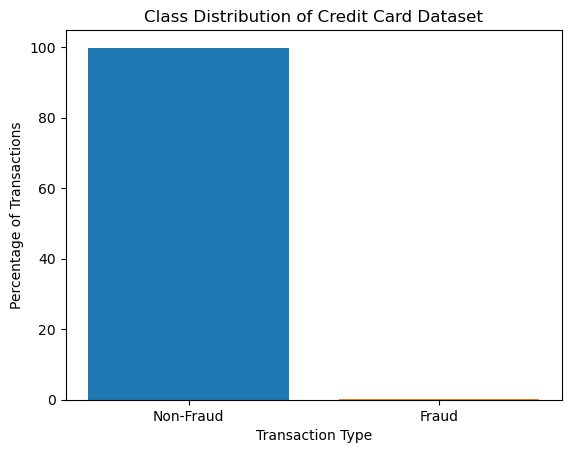

In [ ]:
#Bar Plot for Imbalanced Dataset
labels = ['Non-Fraud', 'Fraud']
sizes = [non_frauds_percent, frauds_percent]
colors = ['#1f77b4', '#ff7f0e']
plt.bar(labels, sizes, color=colors)
plt.title('Class Distribution of Credit Card Dataset')
plt.ylabel('Percentage of Transactions')
plt.xlabel('Transaction Type')
plt.show()


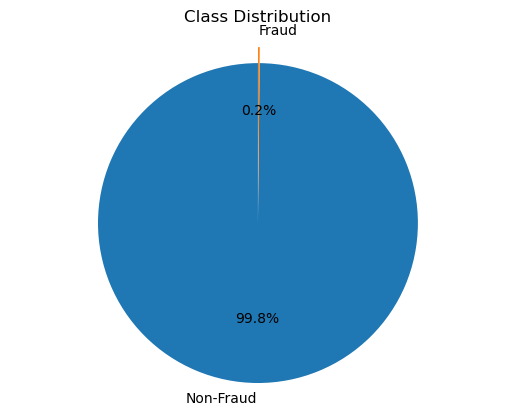

In [ ]:

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))
plt.title('Class Distribution')
plt.axis('equal')
plt.show()


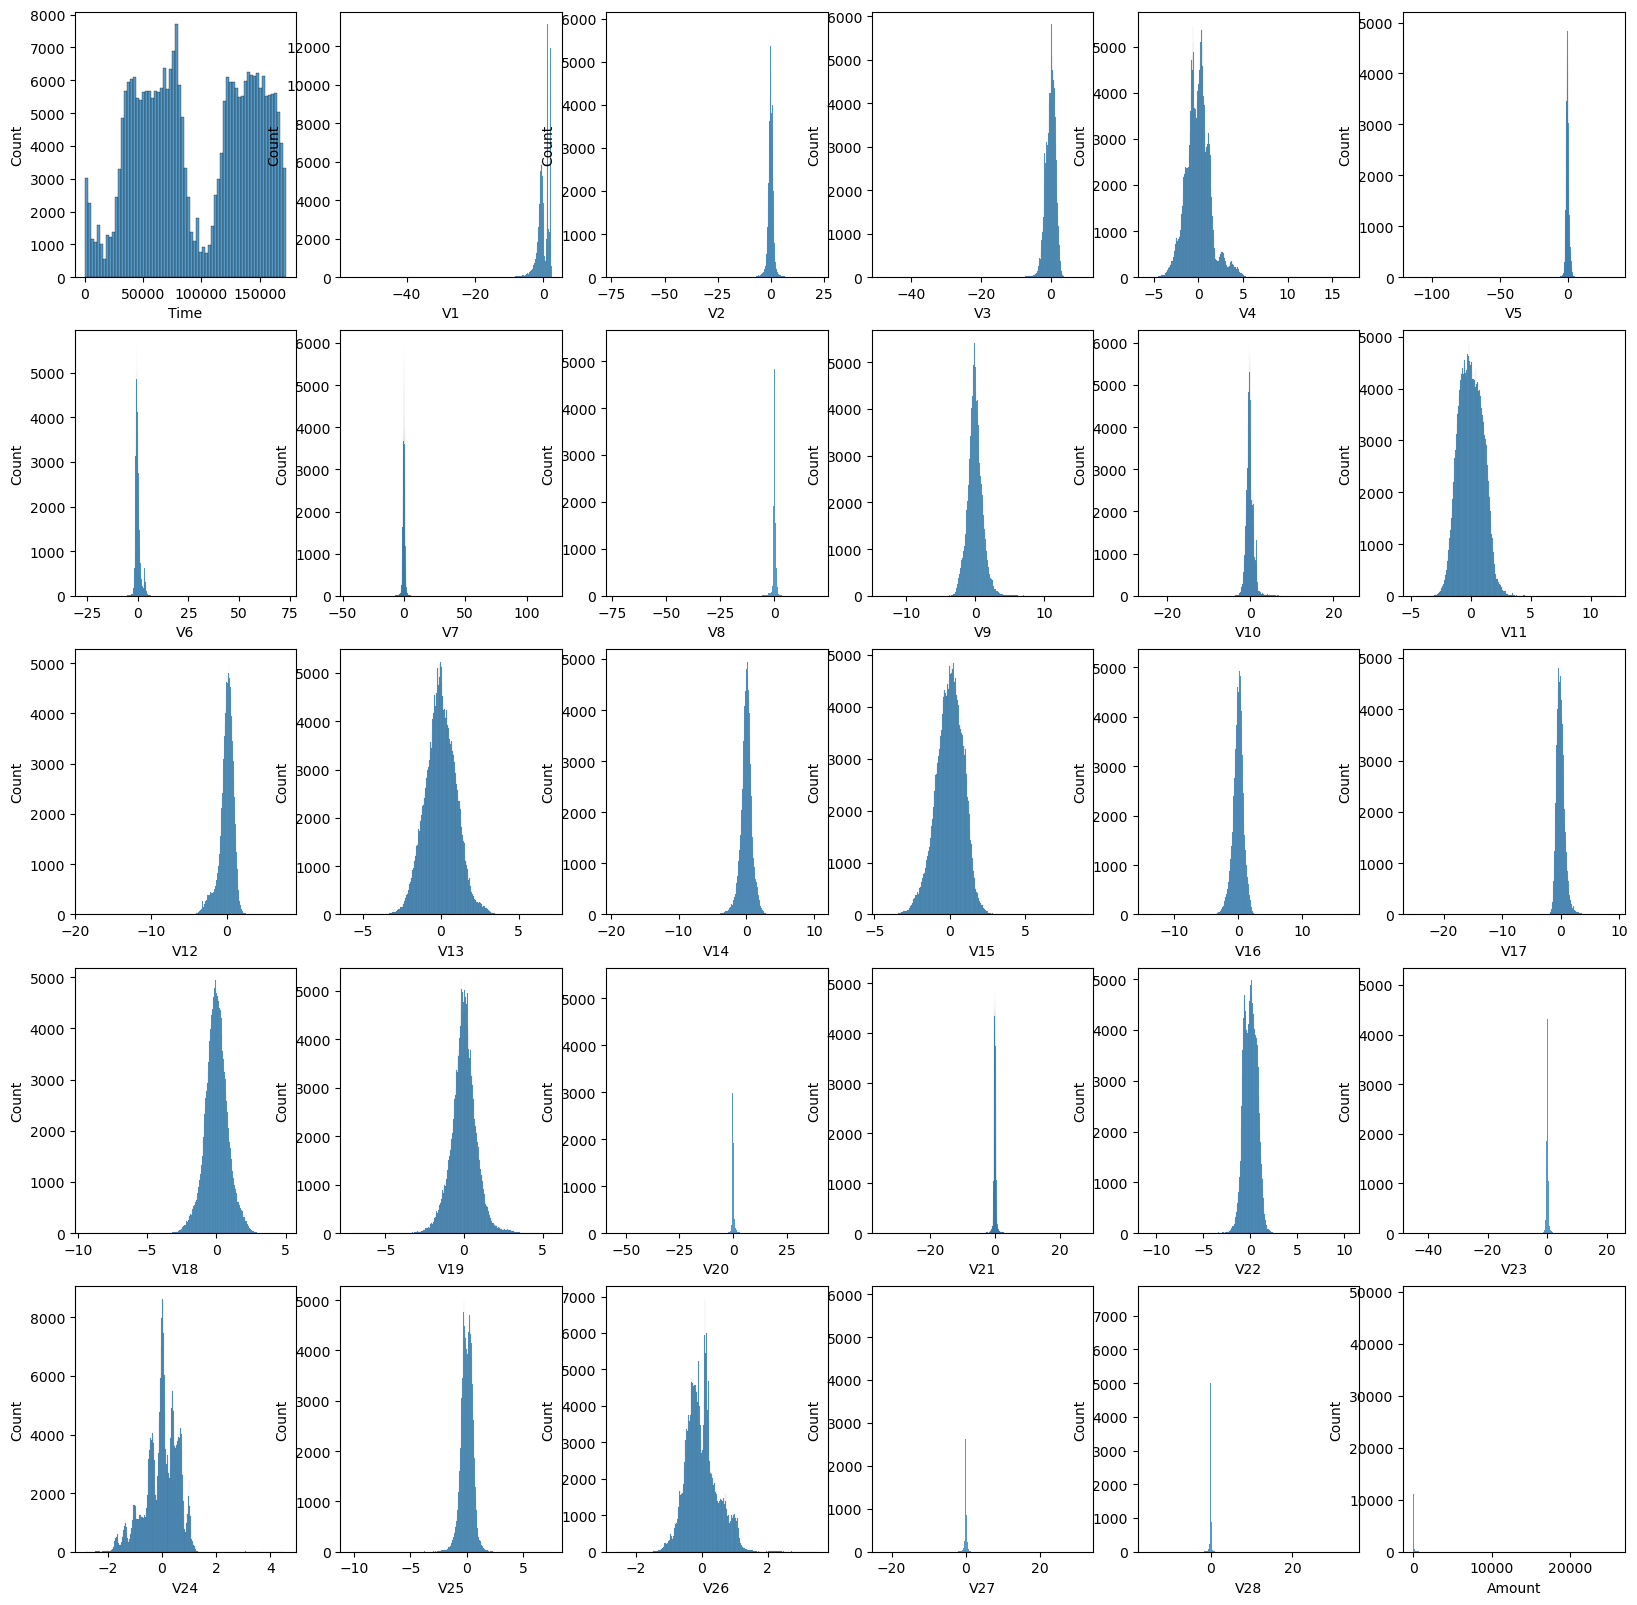

In [ ]:
# Select all columns except the target variable 'Class'
features = df.drop('Class', axis=1).columns
# Plot histograms for each feature
j = 1
plt.figure(figsize = (20,20))
for feature in features:
    plt.subplot(5,6,j)
    j += 1 
    sns.histplot(df[feature], kde=False)
    plt.xlabel(feature)
plt.show()


In [ ]:
# Scale the Time column using Standard Scaler
time_scaler = StandardScaler()
df['Time'] = time_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Scale the Amount column using Robust Scaler
amount_scaler = RobustScaler()
df['Amount'] = amount_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


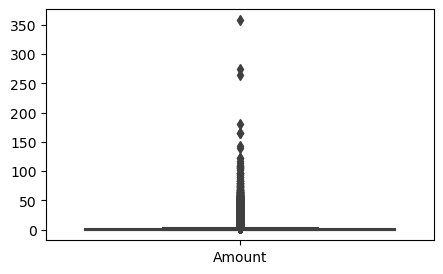

In [ ]:
#Box plot for visualizing outliers in amount class
plt.figure(figsize=(5, 3))
sns.boxplot(data=df[['Amount']])
plt.show()

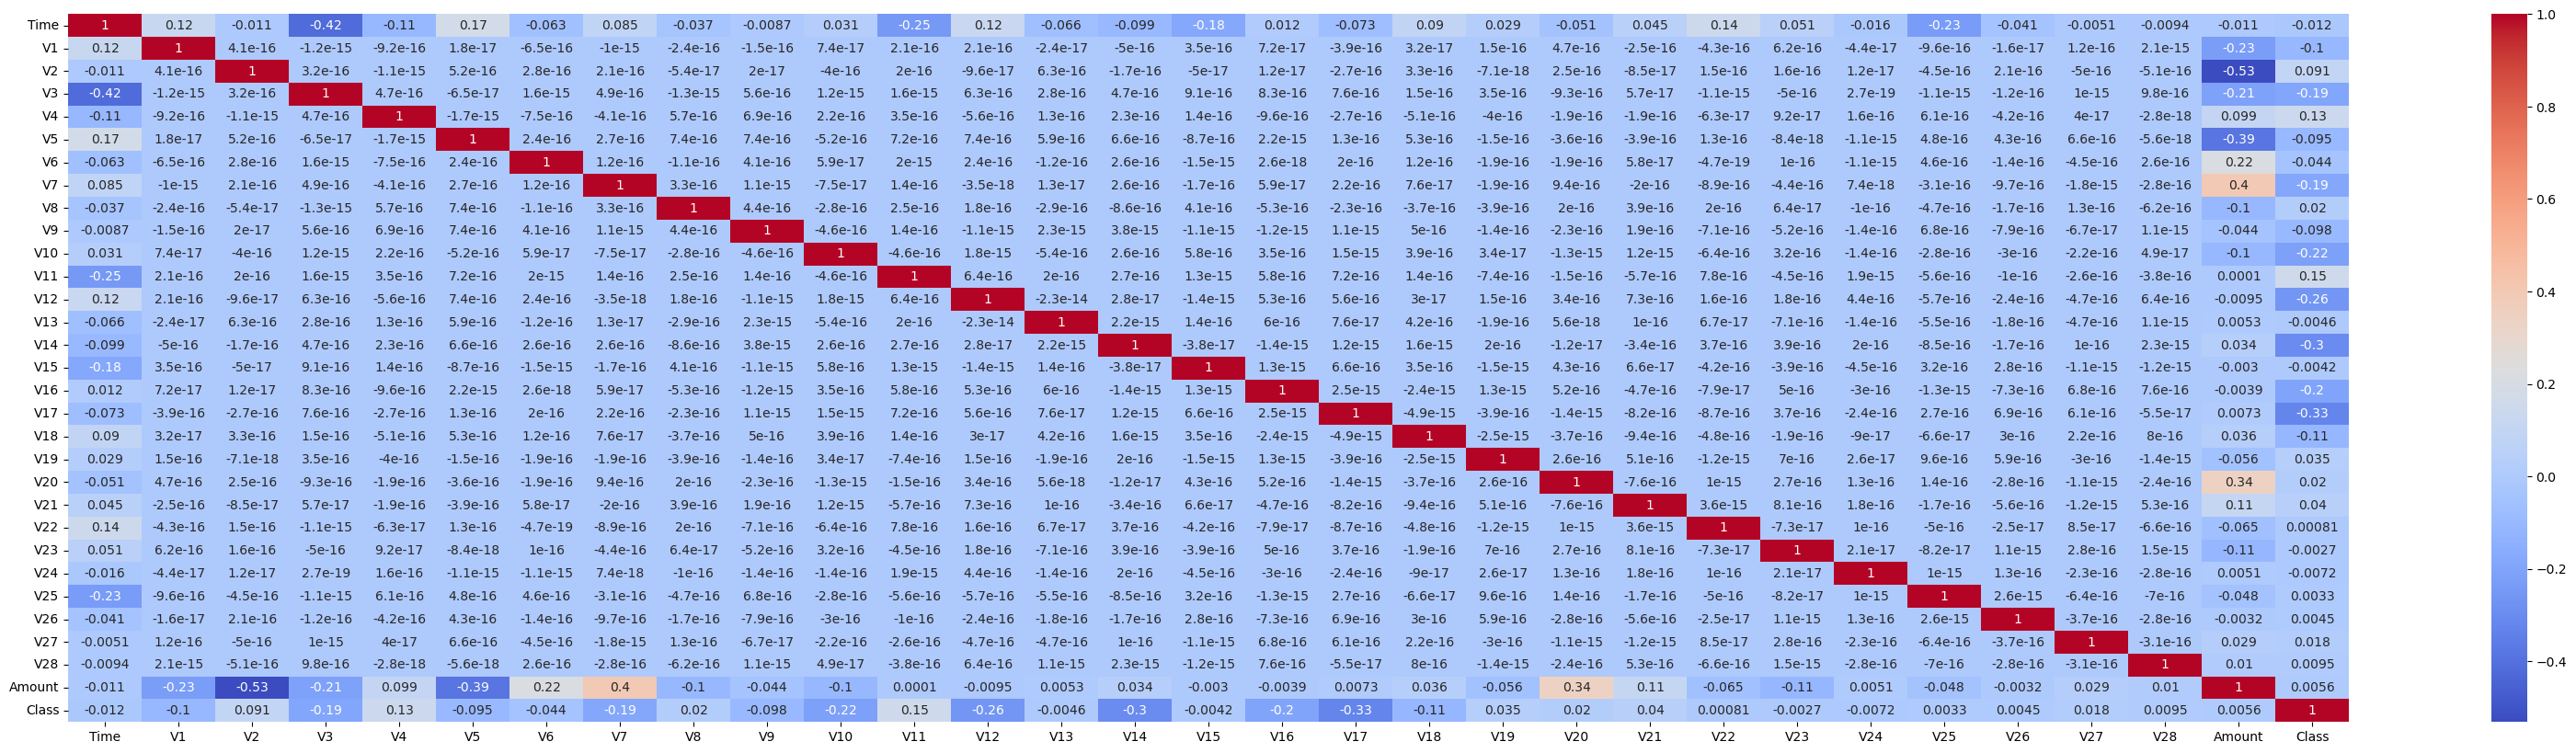

In [ ]:
#Correlation Heatmap
corr = df.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

#  Metrics for evaulating models





In [ ]:
from sklearn.metrics import classification_report 
def calculate_classification_metrics(y_true, y_pred):
    #dictionary of all the calculated metrics
    report = classification_report(y_true, y_pred, output_dict=True)
    classification_metrics = {
        "Precision_1": report['1']['precision'],
        "Recall_1": report['1']['recall'],
        "f1-score_1": report['1']['f1-score'],
        "Precision_0": report['0']['precision'],
        "Recall_0": report['0']['recall'],
        "f1-score_0":report['0']['f1-score']
    }

    return classification_metrics

## Ensemble K-Nearest Neighbour using weighted predictions.

In [ ]:
X = df.drop(["Class","Time"], axis = 1)
y = df["Class"]
# splitting dataset into 70:10:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = .80,random_state=10)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size=(70/80))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score,classification_report

In [ ]:
def train_knn_model(X_train, y_train, X_val,y_val, n_neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_pred = []
    return y_pred,knn_model
def train_knn_bagging_ensemble(X_train, y_train, X_val,y_val, n_neighbors, n_models):
    classifiers = []
    weights = [0 for i in range(n_models)]

    # Train each KNN model in the ensemble and record its trained model and weight
    for i in range(n_models):
        # Randomly select a subset of the training data with replacement
        indices = np.random.choice(X_train.shape[0], size=X_train.shape[0], replace=True)
        X_train_subset = X_train.iloc[indices]
        y_train_subset = y_train.iloc[indices]

        # Train the KNN model on the subset of the training data
        y_pred,knn_model = train_knn_model(X_train_subset, y_train_subset, X_val,y_val, n_neighbors)
        print(X_val.shape)
        y_pred = knn_model.predict(X_val)
        classifiers.append(knn_model)
        # Calculate the G-mean and F-measure of the KNN model's predictions
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        specificity = tn / (tn + fp)
        recall = recall_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        alpha = 1 #for alpha=1, f_measure becomes F1 score
        f_measure = (alpha**2 + 1) * precision * recall / (alpha**2 * precision + recall)
        g_mean = np.sqrt(recall*specificity)
        # calculate the weight of the KNN classifier based on its G-mean and F-measure
        if g_mean > 0.5 and f_measure > 0.5:
            weights[i]  = 1
        else:
            weights[i]  = 0       
    return classifiers, weights
# Prediction of labels for the test dataset based on the weighted average       
def predict(X,classifiers,weights,n_models):
  predictions = np.array([model.predict(X) for model in classifiers])
  predictions = predictions.T
  weights = np.array(weights).reshape(len(weights),1)
  final_predictions = predictions @ weights
  for i in range(len(X)):
    if (final_predictions[i] >= (n_models/2)) :
      final_predictions[i] = 1
    else :
      final_predictions[i] = 0
  return final_predictions


In [ ]:
# Training the K-Nearest neighbour model which n_neighbours=3 and using ensemble learning using this KNN for training 5 models.
classifiers, weights = train_knn_bagging_ensemble(X_train,y_train,X_val,y_val,n_neighbors = 3, n_models = 5)


(28481, 29)


C:\Users\vidit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(28481, 29)


C:\Users\vidit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(28481, 29)


C:\Users\vidit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(28481, 29)


C:\Users\vidit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


(28481, 29)


C:\Users\vidit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
# Predicting the class labels based on the weighted average based on G- mean and F-measure
pred_knn_ensemble = predict(X_test,classifiers,weights,5)

C:\Users\vidit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vidit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [ ]:
print("         Classification Report for Ensemble-KNN \n",classification_report(pred_knn_ensemble,y_test))

         Classification Report for Ensemble-KNN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56885
           1       0.79      0.96      0.87        77

    accuracy                           1.00     56962
   macro avg       0.89      0.98      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:

d = calculate_classification_metrics(pred_knn_ensemble,y_test)

In [ ]:
table.loc["ensemble-KNN"] = d

In [ ]:
import pandas as pd
import numpy as np
import warnings
import random
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install -U imbalanced-learn
import imblearn
print(imblearn.__version__)

Could not fetch URL https://pypi.org/simple/imbalanced-learn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/imbalanced-learn/ (Caused by SSLError(CertificateError("hostname 'pypi.org' doesn't match either of '*.iitj.ac.in', 'iitj.ac.in'"))) - skipping


0.10.1


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ADMIN WORK IIT JODHPUR/creditcard.csv")
df = df.drop("Time",axis = 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# UNDERSAMPLING

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# x = df.drop("Class", axis = 1)
# y = df["Class"]
amount_scaler = RobustScaler()
df['Amount'] = amount_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

train_data,test_data = train_test_split(df,train_size=0.8)
train_data.index = [i for i in range(len(train_data))]
test_data.index = [i for i in range(len(test_data))]
x_train = train_data.drop(["Class"],axis = 1)
y_train  = train_data["Class"]
x_test= test_data.drop(["Class"],axis = 1)
y_test = test_data["Class"]

sampler = RandomUnderSampler(sampling_strategy = 'auto')
X_rs , Y_rs = sampler.fit_resample(x_train,y_train)
print(Counter(Y_rs))
print(Y_rs)

Counter({0: 375, 1: 375})
0      0
1      0
2      0
3      0
4      0
      ..
745    1
746    1
747    1
748    1
749    1
Name: Class, Length: 750, dtype: int64


Non-Fraud transactions are: 50.00% of the dataset
Fraud transactions are: 50.00% of the dataset


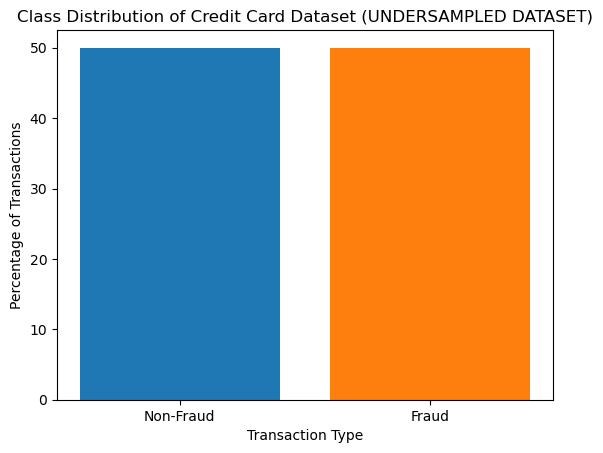

In [ ]:
counts = Y_rs.value_counts()
non_frauds_percent = counts[0] / len(Y_rs) * 100
frauds_percent = counts[1] / len(Y_rs) * 100
print(f"Non-Fraud transactions are: {non_frauds_percent:.2f}% of the dataset")
print(f"Fraud transactions are: {frauds_percent:.2f}% of the dataset")
labels = ['Non-Fraud', 'Fraud']
sizes = [non_frauds_percent, frauds_percent]
colors = ['#1f77b4', '#ff7f0e']
plt.bar(labels, sizes, color=colors)
plt.title('Class Distribution of Credit Card Dataset (UNDERSAMPLED DATASET)')
plt.ylabel('Percentage of Transactions')
plt.xlabel('Transaction Type')
plt.show()

In [ ]:

oversample = SMOTE(sampling_strategy = 'auto')
X, y = oversample.fit_resample(x_train, y_train)
counter = Counter(y)
print(counter)
counter2 = Counter(y_train)
print(counter2)
print(y)
count = 0 

Counter({0: 227470, 1: 227470})
Counter({0: 227470, 1: 375})
0         0
1         0
2         0
3         0
4         0
         ..
454935    1
454936    1
454937    1
454938    1
454939    1
Name: Class, Length: 454940, dtype: int64


Non-Fraud transactions are: 50.00% of the dataset
Fraud transactions are: 50.00% of the dataset


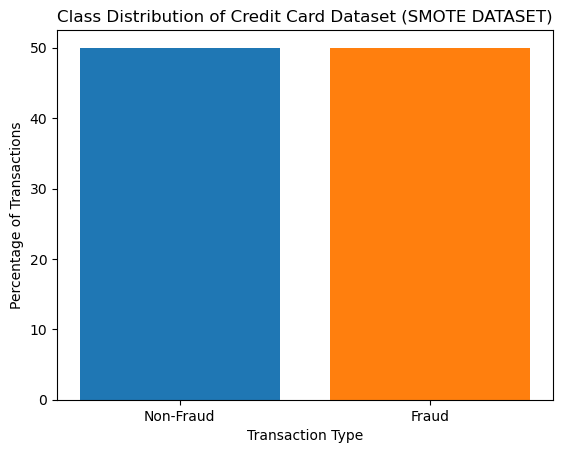

In [ ]:
counts = y.value_counts()
non_frauds_percent = counts[0] / len(y) * 100
frauds_percent = counts[1] / len(y) * 100
print(f"Non-Fraud transactions are: {non_frauds_percent:.2f}% of the dataset")
print(f"Fraud transactions are: {frauds_percent:.2f}% of the dataset")
labels = ['Non-Fraud', 'Fraud']
sizes = [non_frauds_percent, frauds_percent]
colors = ['#1f77b4', '#ff7f0e']
plt.bar(labels, sizes, color=colors)
plt.title('Class Distribution of Credit Card Dataset (SMOTE DATASET)')
plt.ylabel('Percentage of Transactions')
plt.xlabel('Transaction Type')
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define dataset
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x_train, y_train)
# summarize class distribution
print(Counter(y_over))

Counter({0: 227470, 1: 227470})


Non-Fraud transactions are: 50.00% of the dataset
Fraud transactions are: 50.00% of the dataset


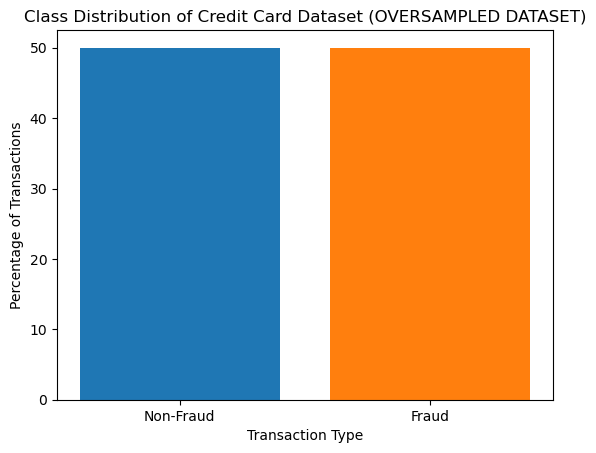

In [ ]:
counts = y_over.value_counts()
non_frauds_percent = counts[0] / len(y_over) * 100
frauds_percent = counts[1] / len(y_over) * 100
print(f"Non-Fraud transactions are: {non_frauds_percent:.2f}% of the dataset")
print(f"Fraud transactions are: {frauds_percent:.2f}% of the dataset")
labels = ['Non-Fraud', 'Fraud']
sizes = [non_frauds_percent, frauds_percent]
colors = ['#1f77b4', '#ff7f0e']
plt.bar(labels, sizes, color=colors)
plt.title('Class Distribution of Credit Card Dataset (OVERSAMPLED DATASET)')
plt.ylabel('Percentage of Transactions')
plt.xlabel('Transaction Type')
plt.show()

In [ ]:
over = RandomOverSampler(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.8)
# first performing oversampling to minority class
X_oversample, y_oversample = over.fit_resample(x_train, y_train)
print(f"Oversampled: {Counter(y_over)}")

# now to comine under sampling 
X_combined_sampling, y_combined_sampling = under.fit_resample(X_oversample, y_oversample)
print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")

Oversampled: Counter({0: 227470, 1: 227470})
Combined Random Sampling: Counter({0: 142168, 1: 113735})


Non-Fraud transactions are: 55.56% of the dataset
Fraud transactions are: 44.44% of the dataset


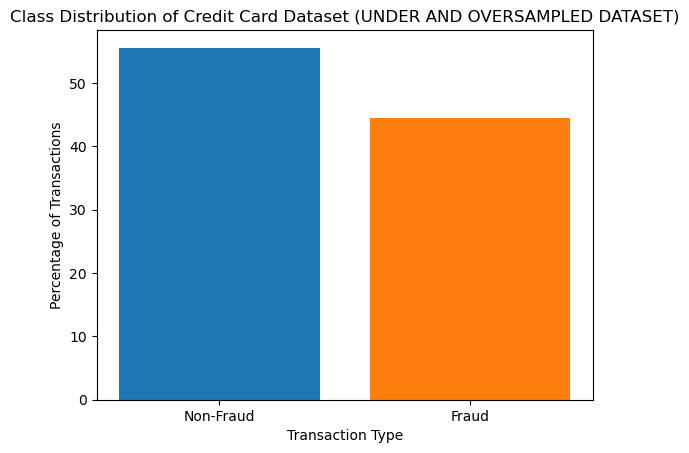

In [ ]:
counts = y_combined_sampling.value_counts()
non_frauds_percent = counts[0] / len(y_combined_sampling) * 100
frauds_percent = counts[1] / len(y_combined_sampling) * 100
print(f"Non-Fraud transactions are: {non_frauds_percent:.2f}% of the dataset")
print(f"Fraud transactions are: {frauds_percent:.2f}% of the dataset")
labels = ['Non-Fraud', 'Fraud']
sizes = [non_frauds_percent, frauds_percent]
colors = ['#1f77b4', '#ff7f0e']
plt.bar(labels, sizes, color=colors)
plt.title('Class Distribution of Credit Card Dataset (UNDER AND OVERSAMPLED DATASET)')
plt.ylabel('Percentage of Transactions')
plt.xlabel('Transaction Type')
plt.show()

In [ ]:

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline




# Bagging on Random undersampled data

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(X_rs, Y_rs)
Undersampled_BaggingClassifier = clf.predict(x_test)
d = calculate_classification_metrics(Undersampled_BaggingClassifier,y_test)
table.loc["Undersampled_Bagging"] = d

# Bagging on Oversampled data

In [ ]:
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(X_over, y_over)
Oversampled_Bagging = clf.predict(x_test)
d = calculate_classification_metrics(Oversampled_Bagging,y_test)
table.loc["Oversampled_Bagging"] = d

# SMOTE


In [ ]:
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(X, y)
smote_bagging = clf.predict(x_test)


In [ ]:
d = calculate_classification_metrics(smote_bagging,y_test)
table.loc["SMOTE_Bagging"] = d

# Combined  Oversampling and Undersampling

In [ ]:
clf = BaggingClassifier(n_estimators=10, random_state=0).fit(X_combined_sampling, y_combined_sampling)
combined_pred = clf.predict(x_test)

In [ ]:
d = calculate_classification_metrics(combined_pred,y_test)
table.loc["Combined_oversampling_undersampling_Bagging"] = d

# PCA

In [ ]:
from sklearn.decomposition import PCA
num_principal_components = 2
ob = PCA(num_principal_components)
new_data = ob.fit_transform(X_rs)
reduced_X = pd.DataFrame(new_data,columns = ["pc_" + str(i) for i in range(1,num_principal_components+1)])

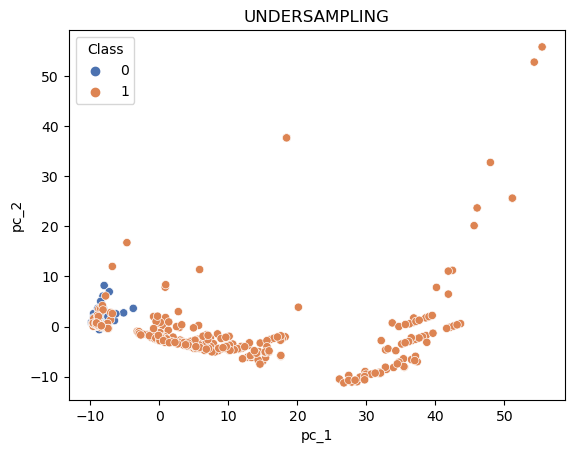

In [ ]:
sns.scatterplot(x = reduced_X.iloc[:,0],y = reduced_X.iloc[:,1],hue = Y_rs,palette = 'deep')
plt.title('UNDERSAMPLING')
plt.show()

In [ ]:
num_principal_components = 2
ob = PCA(num_principal_components)
new_data = ob.fit_transform(X_over)
reduced_X = pd.DataFrame(new_data,columns = ["pc_" + str(i) for i in range(1,num_principal_components+1)])
print(reduced_X)


            pc_1      pc_2
0      -9.300833  1.591853
1      -9.614420  0.688803
2      -9.403189  0.576215
3      -9.181982  1.027031
4      -9.033130  0.877499
...          ...       ...
454935  5.075875 -4.404195
454936  7.205623 -3.990108
454937 -9.173652  0.838558
454938  0.140628 -2.611462
454939 -8.366685 -0.118389

[454940 rows x 2 columns]


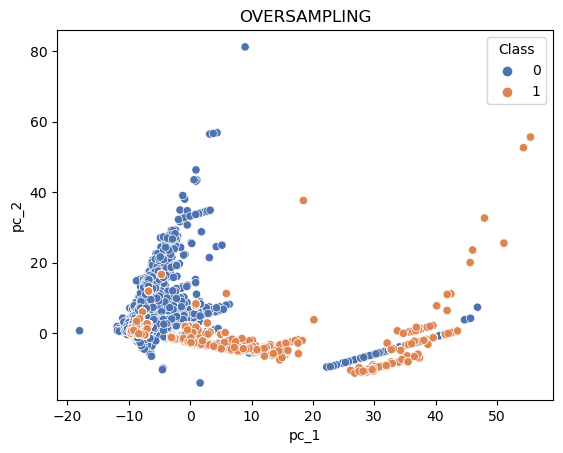

In [ ]:
sns.scatterplot(x = reduced_X.iloc[:,0],y = reduced_X.iloc[:,1],hue = y_over,palette = 'deep')
plt.title('OVERSAMPLING')
plt.show()

In [ ]:
num_principal_components = 2
ob = PCA(num_principal_components)
new_data = ob.fit_transform(x_train)
reduced_X = pd.DataFrame(new_data,columns = ["pc_" + str(i) for i in range(1,num_principal_components+1)])
print(reduced_X)


            pc_1      pc_2
0      -1.333912 -0.465394
1      -1.325848  0.699313
2      -1.372038 -1.020453
3      -0.639859  1.825066
4      -1.425057  1.207959
...          ...       ...
227840  1.784871 -1.616529
227841  0.572037 -2.218527
227842 -1.032484 -1.055917
227843 -0.159446  0.762864
227844 -0.604636  1.412922

[227845 rows x 2 columns]


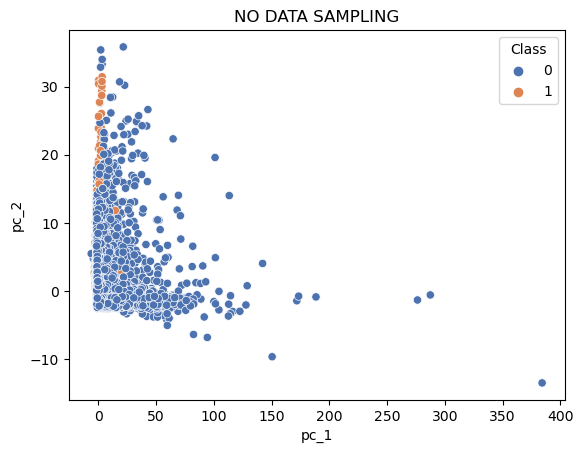

In [ ]:
sns.scatterplot(x = reduced_X.iloc[:,0],y = reduced_X.iloc[:,1],hue = y_train,palette = 'deep')
plt.title('NO DATA SAMPLING')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

num_principal_components = 2
ob = PCA(num_principal_components)
new_data = ob.fit_transform(X)
reduced_X = pd.DataFrame(new_data,columns = ["pc_" + str(i) for i in range(1,num_principal_components+1)])
print(reduced_X)

             pc_1      pc_2
0       -9.310668  1.642589
1       -9.616222  0.699343
2       -9.403363  0.577543
3       -9.185171  1.089313
4       -9.028785  0.951808
...           ...       ...
454935  15.303000 -5.264923
454936  -0.571282  0.362903
454937  35.677077  0.560658
454938   6.229018 -2.924121
454939  -9.292309  0.513093

[454940 rows x 2 columns]


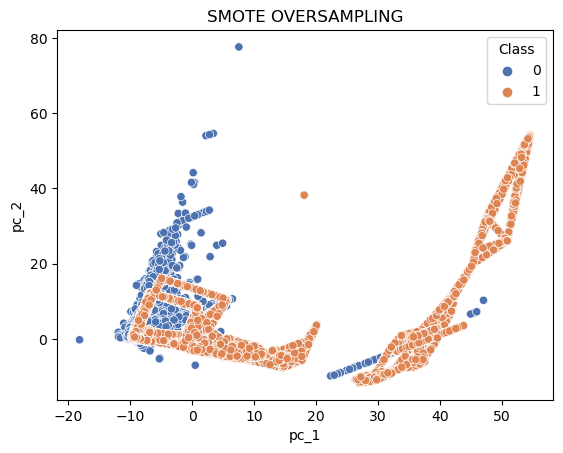

In [ ]:
sns.scatterplot(x = reduced_X.iloc[:,0],y = reduced_X.iloc[:,1],hue = y,palette = 'deep')
plt.title('SMOTE OVERSAMPLING')
plt.show()

In [ ]:
num_principal_components = 2
ob = PCA(num_principal_components)
new_data = ob.fit_transform(X_combined_sampling)
reduced_X = pd.DataFrame(new_data,columns = ["pc_" + str(i) for i in range(1,num_principal_components+1)])
print(reduced_X)

             pc_1      pc_2
0       -8.413342  0.190834
1       -8.322704  0.415536
2       -8.256481  0.663573
3       -8.258224  0.140920
4       -8.403218  0.476075
...           ...       ...
255898  -7.915181  0.249895
255899   1.317035 -2.565477
255900  -7.746615  0.152105
255901   3.366480 -3.491694
255902  13.063730 -4.432678

[255903 rows x 2 columns]


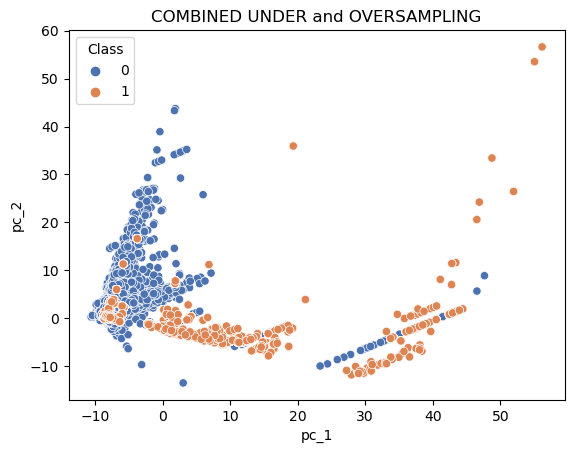

In [ ]:
sns.scatterplot(x = reduced_X.iloc[:,0],y = reduced_X.iloc[:,1],hue = y_combined_sampling,palette = 'deep')
plt.title('COMBINED UNDER and OVERSAMPLING')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

Logistic_pred = clf.predict(x_test)


C:\Users\vidit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
d = calculate_classification_metrics(Logistic_pred,y_test)
table.loc['Logistic_imbalanced'] = d

In [ ]:

import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
def plot_roc_curve(y_tests, y_preds):

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    fpr, tpr, thresholds = roc_curve(y_tests, y_preds)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
#     plt.show()


In [ ]:
clf = LogisticRegression(random_state=0).fit(X_rs, Y_rs)
Logistic_Random_undersampled = clf.predict(x_test)

In [ ]:
d = calculate_classification_metrics(Logistic_Random_undersampled,y_test)
table.loc['Logistic_Random_Undersampled'] = d

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_over, y_over)
print(clf)
Logistic_Oversampled = clf.predict(x_test)


LogisticRegression(random_state=0)


In [ ]:
d = calculate_classification_metrics(Logistic_Oversampled,y_test)
table.loc['Logistic_Oversampled'] = d

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_combined_sampling, y_combined_sampling)
Logistic_combined = clf.predict(x_test)


In [ ]:
d = calculate_classification_metrics(Logistic_combined,y_test)
table.loc["Logistic_combined"] = d

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
GNB_pred = clf.predict(x_test)

In [ ]:
d = calculate_classification_metrics(GNB_pred,y_test)
table.loc["GNB"] = d

In [ ]:
clf = GaussianNB()
clf.fit(X_rs, Y_rs)
GNB_Random_undersampled = clf.predict(x_test)

In [ ]:
d = calculate_classification_metrics(y_test,GNB_Random_undersampled)
table.loc["GNB_Random_Undersampled"] = d


In [ ]:
clf = GaussianNB()
clf.fit(X_over, y_over)
GNB_Oversampled = clf.predict(x_test)

In [ ]:
d = calculate_classification_metrics(y_test,GNB_Oversampled)
table.loc["GNB_Oversampled"] = d


In [ ]:
clf = GaussianNB()
clf.fit(X_combined_sampling, y_combined_sampling)
GNB_combined = clf.predict(x_test)

In [ ]:
d = calculate_classification_metrics(y_test,GNB_combined)
table.loc["GNB_Oversampled"] = d

In [ ]:
table


,Precision_1,Recall_1,f1-score_1,Precision_0,Recall_0,f1-score_0
ensemble-KNN,0.787234,0.961039,0.865497,0.999947,0.999648,0.999798
Undersampled_Bagging,0.905983,0.042967,0.082043,0.958466,0.999798,0.978696
Oversampled_Bagging,0.726496,0.833333,0.776256,0.999701,0.999437,0.999569
SMOTE_Bagging,0.743590,0.737288,0.740426,0.999455,0.999472,0.999463
Combined_oversampling_undersampling_Bagging,0.743590,0.756522,0.750000,0.999507,0.999472,0.999490
Logistic_imbalanced,0.547009,0.927536,0.688172,0.999912,0.999068,0.999490
Logistic_Random_Undersampled,0.905983,0.046923,0.089226,0.962125,0.999799,0.980600
Logistic_Oversampled,0.897436,0.076253,0.140562,0.977623,0.999784,0.988580
Logistic_combined,0.897436,0.089438,0.162665,0.981194,0.999785,0.990402
GNB,0.837607,0.079160,0.144649,0.979945,0.999659,0.989704


Text(0.5, 1.0, 'GNB + Combined')

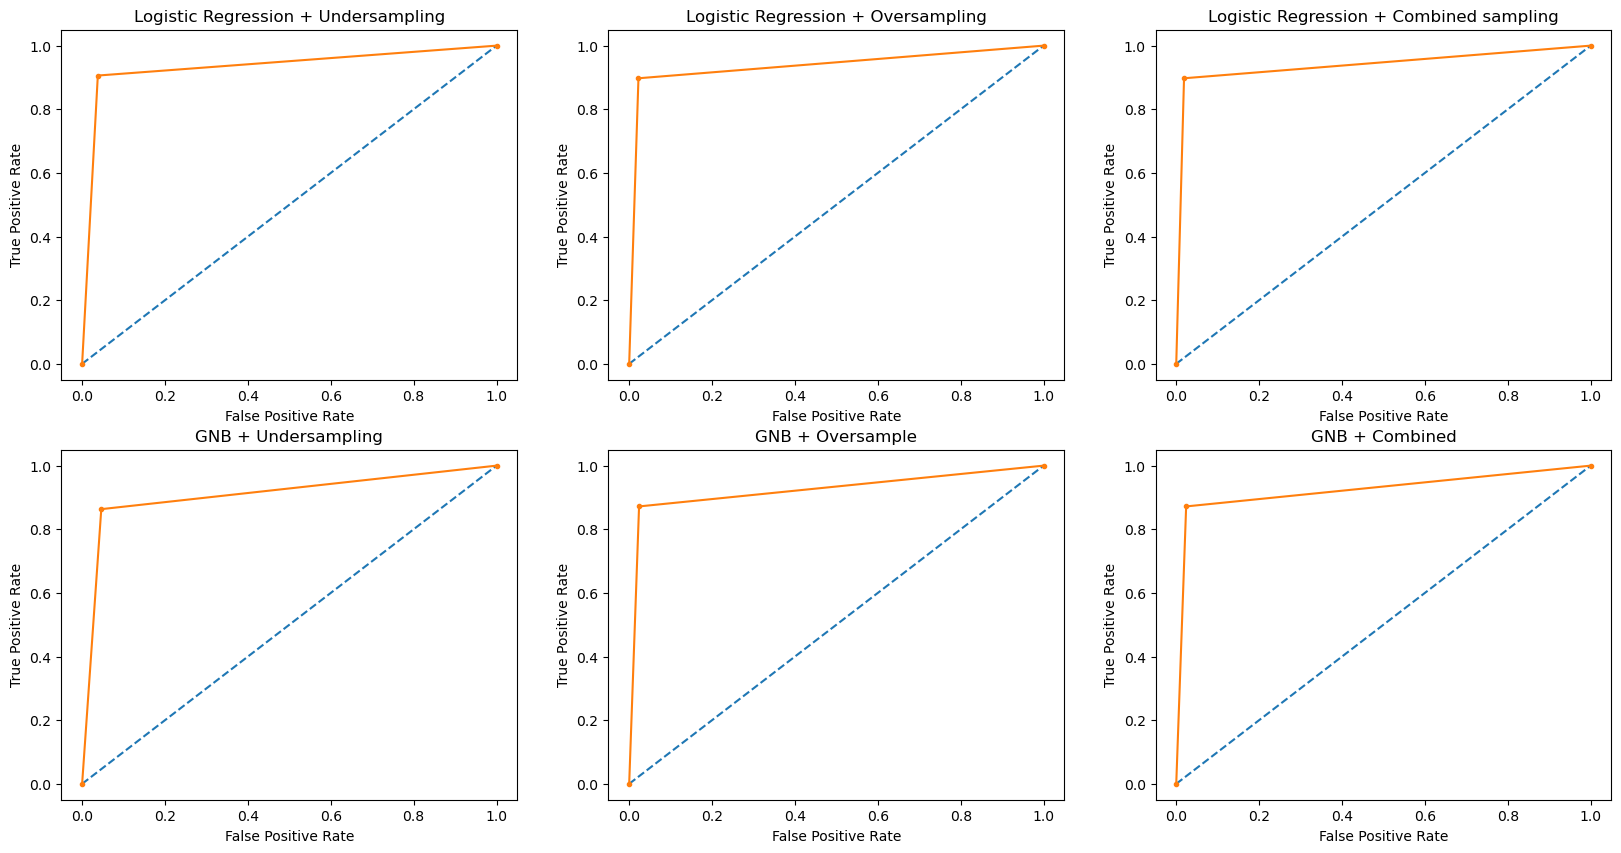

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(231)
plot_roc_curve(y_test,Logistic_Random_undersampled)
plt.title("Logistic Regression + Undersampling")
plt.subplot(232)
plot_roc_curve(y_test,Logistic_Oversampled)
plt.title("Logistic Regression + Oversampling")
plt.subplot(233)
plot_roc_curve(y_test,Logistic_combined)
plt.title("Logistic Regression + Combined sampling")
plt.subplot(234)
plot_roc_curve(y_test,GNB_Random_undersampled)
plt.title("GNB + Undersampling")
plt.subplot(235)
plot_roc_curve(y_test,GNB_Oversampled)
plt.title("GNB + Oversample")
plt.subplot(236)
plot_roc_curve(y_test,GNB_combined)
plt.title("GNB + Combined")

# Cost-sensitive Methods


## Cost-sensitive ADABoost 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("creditcard.csv")


#### Replacing all 0 (as non - Fraud transaction to -1)

In [ ]:
X = df.drop(["Class","Time"], axis = 1)
for i,rows in df.iterrows():
    if(rows["Class"] == 0):
        df.loc[i,"Class"] = -1
y = df["Class"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = .80,random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
class CSAdaBoost:
    def __init__(self):
        self.stumps = None
        self.stump_weights = None
        self.errors = None
        self.sample_weights = None
    def fit(self, X, y, iters ):
        n = X.shape[0]  #number of features

        # init numpy arrays
        self.sample_weights = np.zeros(shape=(iters, n))
        self.stumps = np.zeros(shape=iters, dtype=object)
        self.stump_weights = np.zeros(shape=iters)
        self.errors = np.zeros(shape=iters)

        # initializing weights uniformly
        self.sample_weights[0] = np.ones(shape=n) / n

        for t in range(iters):
            print("Enter ",t)
            # fit  weak learner
            curr_sample_weights = self.sample_weights[t]
            # Training a Decision stump 
            stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
            stump = stump.fit(X, y, sample_weight=curr_sample_weights)
            # calculating error and stump weight from weak learner prediction
            stump_pred = stump.predict(X)
            correct = (stump_pred == y)
            incorrect = (stump_pred != y)
            FP = (incorrect * (stump_pred == 1))
            TP = (correct * (stump_pred == 1))
            FN = (incorrect * (stump_pred == -1))
            TN = (correct * (stump_pred == -1))
            # we are assuming that minority is positive class
            wtp = 50   #-1 for tradional ADABoost
            wfn = 500   # 1
            wfp = 50   # 1
            wtn = -50   #-1
            n = abs(wtp) + abs(wfn) + abs(wfp) + abs(wtn)
            #Normalizing the weights
            wtp = wtp/n
            wfn = wfn/n
            wfp = wfp/n
            wtn = wtn/n
            # array having wieght factor for all the sample depending on the type error 
            C = (wtp*TP) + (wtn*TN) + (wfp*FP) + (wfn*FN)  
            err = curr_sample_weights[(stump_pred != y)].sum()
            stump_weight = np.log((1 - err) / err) / 2
            # updating sample weights
            new_sample_weights = (
                curr_sample_weights * np.exp(stump_weight*C)
            )
            # Normalizing the weights
            sumofw = new_sample_weights.sum()
            new_sample_weights /= sumofw

            # If not final iteration, update sample weights for t+1
            if t+1 < iters:
                self.sample_weights[t+1] = new_sample_weights
            # save results of iteration
            self.stumps[t] = stump
            self.stump_weights[t] = stump_weight
            self.errors[t] = err
            if(abs(self.errors[t-1] - err) <= 0.0001):
                return self
            print("exit ",err," ",stump_weight)
        return self
    def predict(self, X):
        
        stump_preds = np.array([stump.predict(X) if type(stump) != int else 0 for stump in self.stumps])
        # we will do prediction using Majority Voting, we will take the sum of all prediction , if posotive
        # then we can say that positive class is in majority.
        return np.sign(np.dot(self.stump_weights, stump_preds))

In [ ]:
clf = CSAdaBoost().fit(X_train, y_train, iters=30)
CSADABoost_pred = clf.predict(X_test)

Enter  0
exit  0.000943623954881608   3.482419377306886
Enter  1
exit  0.006880263173248351   2.4860971672647927
Enter  2
exit  0.043684911946623606   1.5430423353288916
Enter  3
exit  0.13254227841788957   0.9393325488877481
Enter  4
exit  0.16735394007323373   0.8022488412677168
Enter  5
exit  0.2617103089633118   0.5185490409022913
Enter  6
exit  0.32481501859642686   0.3658654265564622
Enter  7
exit  0.3426762651611392   0.32569523804520245
Enter  8
exit  0.2893458980877049   0.44928148230280146
Enter  9
exit  0.3212702938855531   0.37397008302411056
Enter  10
exit  0.35062644313774216   0.3081433736664391
Enter  11
exit  0.3568919756918184   0.29443978185731673
Enter  12
exit  0.3290662975739761   0.3562055425543772
Enter  13
exit  0.34714973850478575   0.31579579223098114
Enter  14
exit  0.3330697497392851   0.3471667707006106
Enter  15
exit  0.3447706800166673   0.3210528903937507
Enter  16
exit  0.34093156336275265   0.3295728075707771
Enter  17
exit  0.4088509489939687   0.184

## Optimal value for number of stumps

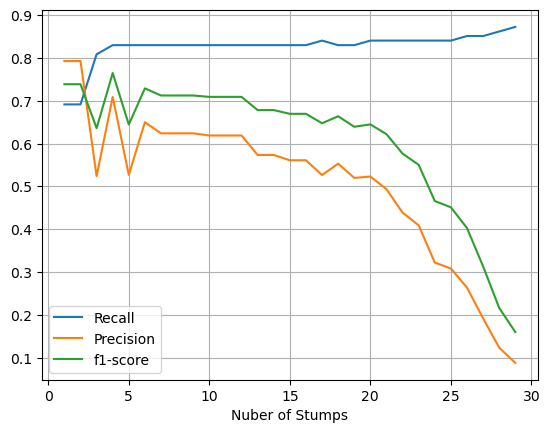

In [ ]:

R1 = []
P1 = []
f1 = []
x = 30
for i in range(1,x):
    stump_preds = np.array([stump.predict(X_test) for stump in clf.stumps[:i]])
    final_pred = np.sign(np.dot(clf.stump_weights[:i], stump_preds))
#     correct = (final_pred == y_test)
#     incorrect = (final_pred != y_test)
    FP = ((final_pred != y_test) * (final_pred == 1)).sum()
    TP = ((final_pred == y_test) * (final_pred == 1)).sum()
    FN = ((final_pred != y_test)* (final_pred == -1)).sum()
    TN = ((final_pred == y_test) * (final_pred == -1)).sum()
    r1 = TP/(TP + FN)
    p1 = TP/(TP+FP)
    r0 = TN/(TN+FN)
    p0 = TN/(TN+FN)
    R1.append(r1)
    P1.append(p1)
    f1.append(2/((1/r1)+(1/p1)))
plt.plot([i for i in range(1,x)], R1,label = "Recall")
plt.plot([i for i in range(1,x)], P1,label = "Precision")
plt.plot([i for i in range(1,x)], f1, label = "f1-score")
plt.xlabel("Nuber of Stumps")
plt.legend()
plt.grid()

### From the above graph we can say that  4 is the best value for number of stumps.

In [ ]:
    
    
    optimal_stumps = 4
    stump_preds = np.array([stump.predict(X_test) for stump in clf.stumps[:optimal_stumps]])
    final_pred = np.sign(np.dot(clf.stump_weights[:optimal_stumps], stump_preds))
    FP = ((final_pred != y_test) * (final_pred == 1)).sum()
    TP = ((final_pred == y_test) * (final_pred == 1)).sum()
    FN = ((final_pred != y_test)* (final_pred == -1)).sum()
    TN = ((final_pred == y_test) * (final_pred == -1)).sum()
#     print("accuracy for fraud: ",(TP/(TP+FN))*100)
#     print("accuracy for non fraud ",(TN/(TN+FP))*100)
#     print("probability of c", (FP/(TN+FP)))
    r1 = TP/(TP + FN)
    p1 = TP/(TP+FP)
    r0 = TN/(TN+FN)
    p0 = TN/(TN+FN)
    d = {
        "Precision_1": p1 ,
        "Recall_1": r1,
        "f1-score_1": 2/((1/p1)+(1/r1)),
        "Precision_0": r0,
        "Recall_0": p0,
        "f1-score_0":2/((1/p0)+(1/r0))
    }

In [ ]:
d

{'Precision_1': 0.7090909090909091,
 'Recall_1': 0.8297872340425532,
 'f1-score_1': 0.7647058823529413,
 'Precision_0': 0.9997185675086189,
 'Recall_0': 0.9997185675086189,
 'f1-score_0': 0.9997185675086188}

In [ ]:
table.loc["CS_ADABoost"] = d


# Cost-sensitive ANN

In [ ]:
df = pd.read_csv("creditcard.csv")

In [ ]:
df.astype(float)
X = df.drop(["Class","Time"], axis = 1)
y = df["Class"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = .80,random_state=10)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,train_size=(70/80))
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
sc.fit(X_train)
X_train.iloc[:,:] = sc.transform(X_train)
X_test.iloc[:,:] = sc.transform(X_test)
X_val.iloc[:,:] = sc.transform(X_val)

In [ ]:
(y_val == 1).sum()

48

In [ ]:
import tensorflow as tf
from sklearn.metrics import classification_report

def CS_ANN(weight,df):
    # input layer
    inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))
    # hidden layers
    hidden1 = tf.keras.layers.Dense(units= 32, activation='relu')(inputs)
    hidden2 = tf.keras.layers.Dense(units= 16, activation='relu')(hidden1)
    # output layer
    outputs = tf.keras.layers.Dense(units = 1, activation='sigmoid')(hidden2)
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    def compute_loss(yt, yp):
    #     loss for a single pair of y_true and y_pred.
        loss = tf.where(tf.equal(yt, 1), weight * tf.square(yt - yp), (1-weight) * tf.square(yt - yp))
        return loss

    def my_loss(y_true, y_pred):
        y_true = tf.cast(y_true, y_pred.dtype)
        # applying compute_loss function to each element of y_true and y_pred.
        loss_per_element = tf.map_fn(lambda x: compute_loss(x[0], x[1]), (y_true, y_pred), dtype=tf.float32)
        return loss_per_element
    
    model.compile(optimizer='adam', loss=my_loss)
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=512)
    # testing model on validation dataset
    pred = model.predict(X_val)
    for threshold in np.arange(0.1,1,0.1):
        predicted = [1 if x >= threshold else 0 for x in pred]
        classification_metrics = calculate_classification_metrics(np.array(predicted), y_val)
        df.loc[len(df)] = [weight,threshold,classification_metrics["Recall_1"],classification_metrics["Precision_1"],classification_metrics["f1-score_1"],classification_metrics["Recall_0"],classification_metrics["Precision_0"],classification_metrics["f1-score_0"]]
        
    return model

In [ ]:
models = []
df = pd.DataFrame(columns = ["Weight","Threshold","Recall_class1","Precision_class1","f1-score_1","Recall_class0","Precision_class","f1-score_0"])
for i in np.arange(0.5,1,0.1):
    model = CS_ANN(i,df)
#     print(df)
    models.append(model)

Epoch 1/10
390/390 [==============================] - 22s 54ms/step - loss: 0.0046
Epoch 2/10
390/390 [==============================] - 21s 54ms/step - loss: 9.1917e-04
Epoch 3/10
390/390 [==============================] - 21s 54ms/step - loss: 8.9149e-04
Epoch 4/10
390/390 [==============================] - 21s 54ms/step - loss: 8.8442e-04
Epoch 5/10
390/390 [==============================] - 21s 54ms/step - loss: 8.8157e-04
Epoch 6/10
390/390 [==============================] - 21s 54ms/step - loss: 8.8016e-04
Epoch 7/10
390/390 [==============================] - 21s 54ms/step - loss: 8.7936e-04
Epoch 8/10
390/390 [==============================] - 21s 54ms/step - loss: 8.7887e-04
Epoch 9/10
390/390 [==============================] - 21s 55ms/step - loss: 8.7856e-04
Epoch 10/10
891/891 [==============================] - 1s 1ms/step
Epoch 1/10
390/390 [==============================] - 22s 54ms/step - loss: 0.0054
Epoch 2/10
390/390 [==============================] - 21s 55ms/step - l

In [ ]:
print(df.to_string())

    Weight  Threshold  Recall_class1  Precision_class1  f1-score_1  Recall_class0  Precision_class  f1-score_0
0      0.5        0.1       0.000000          0.000000    0.000000       0.998315         1.000000    0.999157
1      0.5        0.2       0.000000          0.000000    0.000000       0.998315         1.000000    0.999157
2      0.5        0.3       0.000000          0.000000    0.000000       0.998315         1.000000    0.999157
3      0.5        0.4       0.000000          0.000000    0.000000       0.998315         1.000000    0.999157
4      0.5        0.5       0.000000          0.000000    0.000000       0.998315         1.000000    0.999157
5      0.5        0.6       0.000000          0.000000    0.000000       0.998315         1.000000    0.999157
6      0.5        0.7       0.000000          0.000000    0.000000       0.998315         1.000000    0.999157
7      0.5        0.8       0.000000          0.000000    0.000000       0.998315         1.000000    0.999157
8

## Making predictions on our best model

In [ ]:
best_model = models[-1]
values = model.predict(X_test)
ANN_predictions = [1 if x >= 0.9 else 0 for x in values]
classification_metrics = calculate_classification_metrics(np.array(ANN_predictions), y_test)


1781/1781 [==============================] - 2s 1ms/step


In [ ]:

fp = []
r = []
best_model = models[-1]
values = model.predict(X_test)
for i in np.arange(0,1,0.01):
    ANN_predictions = [1 if x >= i else 0 for x in values]
    classification_metrics = calculate_classification_metrics(np.array(ANN_predictions), y_test)
    fp.append(1 - classification_metrics["Precision_1"])
    r.append(classification_metrics["Recall_1"])


5
1781/1781 [==============================] - 2s 1ms/step


## Results for model on test dataset 

In [ ]:
print(classification_metrics)

{'Precision_1': 0.8085106382978723, 'Recall_1': 0.8941176470588236, 'f1-score_1': 0.8491620111731844, 'Precision_0': 0.9998417387634522, 'Recall_0': 0.9996835276122158, 'f1-score_0': 0.9997626269286563}


In [ ]:
table.loc["CS_ANN"] = classification_metrics

# Final results of all models

In [ ]:
table

,Precision_1,Recall_1,f1-score_1,Precision_0,Recall_0,f1-score_0
ensemble-KNN,0.787234,0.961039,0.865497,0.999947,0.999648,0.999798
Undersampled_Bagging,0.905983,0.042967,0.082043,0.958466,0.999798,0.978696
Oversampled_Bagging,0.726496,0.833333,0.776256,0.999701,0.999437,0.999569
SMOTE_Bagging,0.743590,0.737288,0.740426,0.999455,0.999472,0.999463
Combined_oversampling_undersampling_Bagging,0.743590,0.756522,0.750000,0.999507,0.999472,0.999490
Logistic_imbalanced,0.547009,0.927536,0.688172,0.999912,0.999068,0.999490
Logistic_Random_Undersampled,0.905983,0.046923,0.089226,0.962125,0.999799,0.980600
Logistic_Oversampled,0.897436,0.076253,0.140562,0.977623,0.999784,0.988580
Logistic_combined,0.897436,0.089438,0.162665,0.981194,0.999785,0.990402
GNB,0.837607,0.079160,0.144649,0.979945,0.999659,0.989704
